# Mapas Region Metropolitana, área Santiago


## Importar librerias
Inicialmente importamos las librerias necesarias para el funcionamiento del notebook 

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

## Asignación de variables
Asignamos el nombre de la region que se utilizara en los graficos junto con el codigo de la region. Se define tambien la ruta del csv.

In [2]:
Region = 'Metropolitana'
codigo = '13gs'
codigo_filtrado = '13'
ruta_csv = '../../../../data/processed_data/maestro/csv_maestro.csv'
archivo_geojson = '13gs.json'

## Configuracion de graficos
Asignamos el tamaño de los graficos y mapas. Tambien opcionalmente podemos ocultar los titulos del grafico y aumentar el tamaño de la letra de estos.

In [3]:
# Tamaño de los graficos y mapas
graph_size = (8, 8)
map_size = (9, 5)

# Oculta el color del titulo y le asigna tamaño 0 
plt.rcParams['axes.titlecolor'] = 'none' 
plt.rcParams['axes.titlesize'] = 0

# Tamaño de las letras
plt.rcParams.update({'font.size': 14})

## Importar el geojson
Cargamos el archivo correspondiente geoJson de la Region que se encuentra en la misma carpeta del notebook.

In [4]:
# Cargar el archivo .geojson
gdf = gpd.read_file(archivo_geojson)

# seleccionamos Area Santiago + San Bernardo y Puente Alto
gdf=gdf[(gdf["NOM_PROVIN"] == "SANTIAGO") | (gdf["NOM_COMUNA"].isin(["SAN BERNARDO", "PUENTE ALTO"]))]

## Importación y filtrado csv
Inicialmente se debe importar el csv y filtrar de acuerdo a la región a analizar.

In [5]:
# Leer el CSV
df = pd.read_csv(ruta_csv)
# Filtra la region especifica
df = df[df["Código región"] == int(codigo_filtrado)]

Se une el CSV importado con el gdf con los datos espaciales.

In [6]:
merge_df = gdf.merge(
    df,
    left_on='COMUNA',     
    right_on='Código comuna',  
    how='inner'
)

## Poblacion migrante por comuna

### Grafico de resultados - Poblacion migrante (%)
Se grafican los resultados obtenidos en orden ascendente.

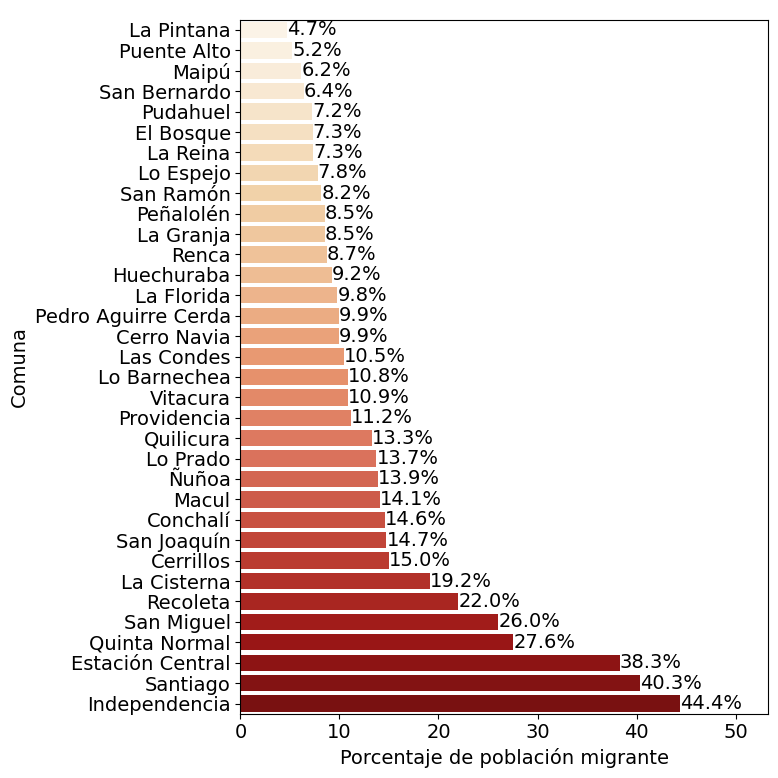

In [7]:
# Ordenar comunas
df_plot = merge_df.sort_values("porcentaje_migrante_total", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="porcentaje_migrante_total", y="Comuna_y", data=df_plot, palette="OrRd", hue="Comuna_y")

plt.xlabel("Porcentaje de población migrante")
plt.ylabel("Comuna")
plt.title(f"Porcentaje de población migrante por comuna - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["porcentaje_migrante_total"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje_migrante_total"]):
    plt.text(value, index, f"{value:.1f}%", va='center')

plt.tight_layout()
# Guardar
plt.savefig(
    f"../../../../figures/regiones/{codigo}/poblacion_migrante_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Poblacion migrante (%)
Se grafican los resultados obtenidos en un mapa de coropletas

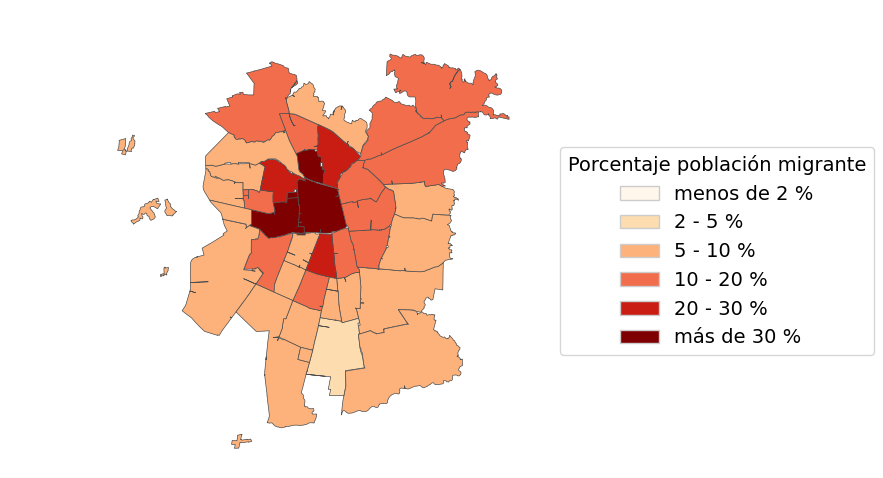

In [25]:
# Crear categorías manuales
bins = [0, 2, 5, 10, 20, 30, 100]
labels = ["menos de 2 %", "2 - 5 %", "5 - 10 %", "10 - 20 %","20 - 30 %", "más de 30 %"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["porcentaje_migrante_total"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("OrRd", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False, 
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Porcentaje población migrante",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_title(f"Porcentaje de población migrante por comuna - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
# Guardar
plt.savefig(
    f"../../../../figures/regiones/{codigo}/poblacion_migrante_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Porcentaje beneficiario FONASA migrante

### Grafico de resultados - FONASA migrante (%)
Se grafican los resultados obtenidos en orden ascendente.

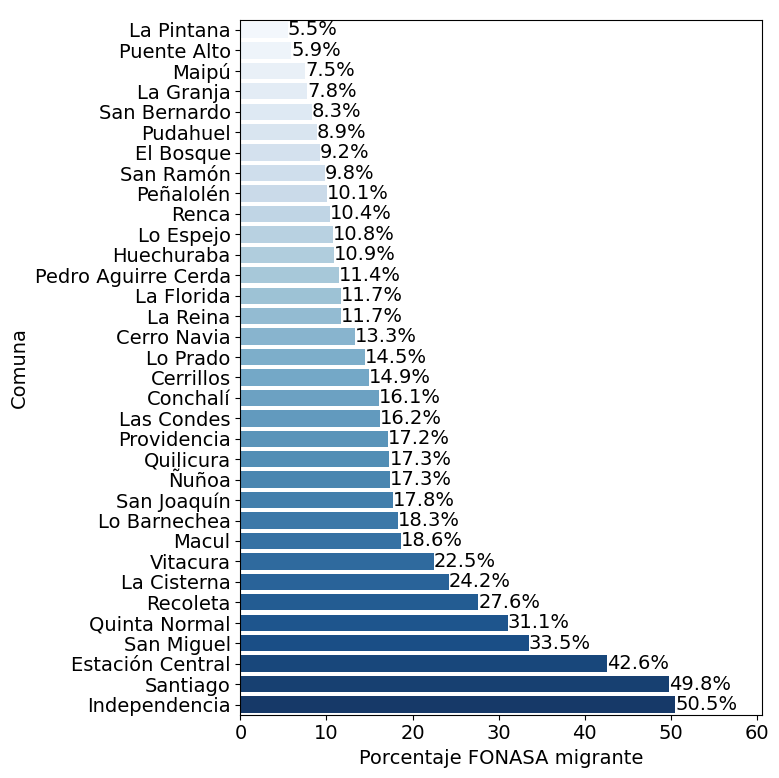

In [9]:
# Ordenar comunas
df_plot = merge_df.sort_values("porcentaje_migrante_fonasa", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="porcentaje_migrante_fonasa", y="Comuna_y", data=df_plot, palette="Blues", hue="Comuna_y")

plt.xlabel("Porcentaje FONASA migrante")
plt.ylabel("Comuna")
plt.title(f"Proporción de migrantes entre beneficiarios de Fonasa por comuna - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["porcentaje_migrante_fonasa"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje_migrante_fonasa"]):
    plt.text(value, index, f"{value:.1f}%", va='center')

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/fonasa_migrante_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - FONASA migrante (%)
Se grafican los resultados obtenidos en un mapa de coropletas

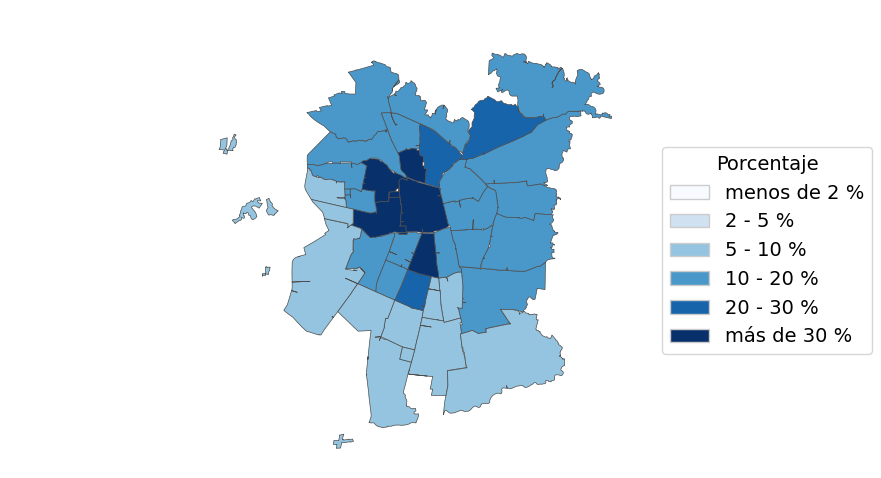

In [26]:
# categorias manuales
bins = [0, 2, 5, 10, 20, 30, 100]
labels = ["menos de 2 %", "2 - 5 %", "5 - 10 %", "10 - 20 %","20 - 30 %", "más de 30 %"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["porcentaje_migrante_fonasa"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa 
cmap = plt.get_cmap("Blues", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False, 
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Porcentaje",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_title(f"Porcentaje de migrantes entre beneficiarios de Fonasa por comuna - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
# Guardar
plt.savefig(
    f"../../../../figures/regiones/{codigo}/fonasa_migrante_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Ruralidad y nivel de ingresos

### Grafico de resultados - Ruralidad
Se grafican los resultados obtenidos en orden ascendente.

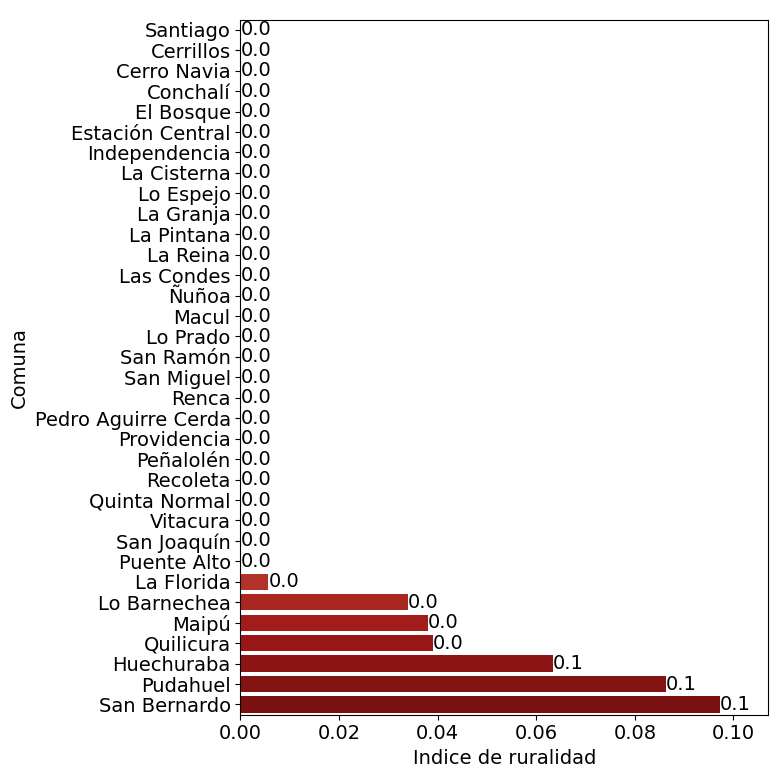

In [11]:
# Ordenar comunas
df_plot = merge_df.sort_values("ruralidad", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="ruralidad", y="Comuna_y", data=df_plot, palette="OrRd", hue="Comuna_y")

plt.xlabel("Indice de ruralidad")
plt.ylabel("Comuna")
plt.title(f"Indice de ruralidad por comuna - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["ruralidad"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.1)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["ruralidad"]):
    plt.text(value, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/ruralidad_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Ruralidad
Se grafican los resultados obtenidos en un mapa de coropletas

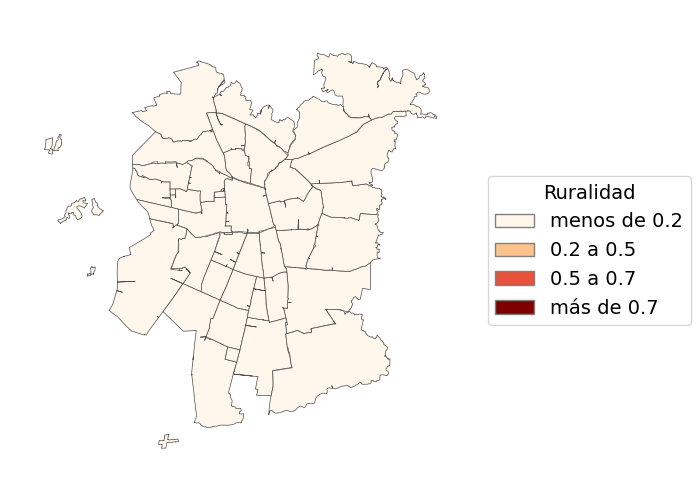

In [27]:
# Crear categorías manuales
bins = [0, 0.2, 0.5, 0.7, 1]
labels = ["menos de 0.2", "0.2 a 0.5", "0.5 a 0.7", "más de 0.7"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["ruralidad"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("OrRd", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False, 
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.5', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Ruralidad",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_title(f"Indice de ruralidad por comuna - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/ruralidad_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Grafico de resultados - Nivel de ingresos promedio
Se grafican los resultados obtenidos en orden ascendente.

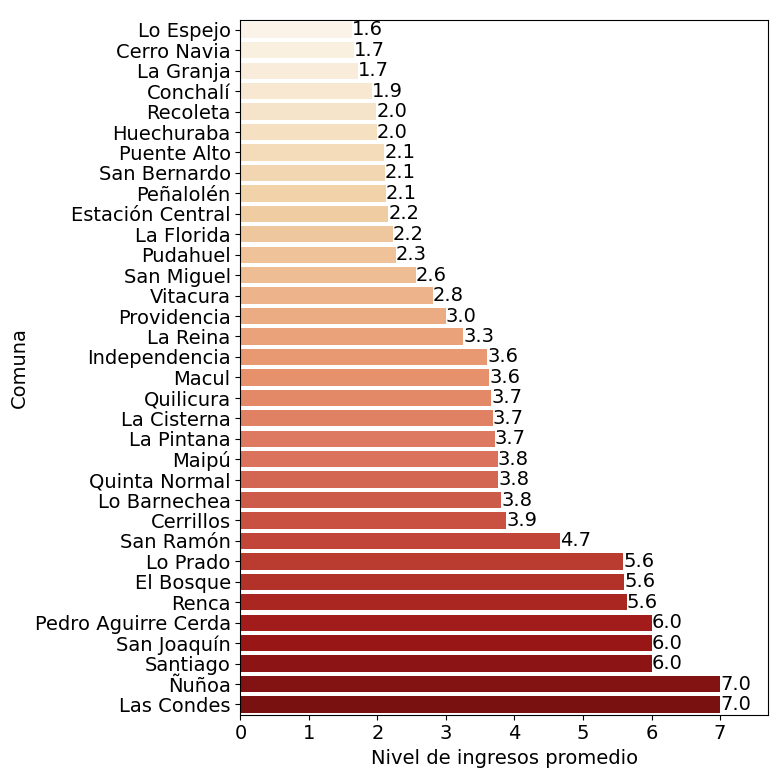

In [13]:
# Ordenar comunas
df_plot = merge_df.sort_values("nivel_promedio", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="nivel_promedio", y="Comuna_y", data=df_plot, palette="OrRd", hue="Comuna_y")

plt.xlabel("Nivel de ingresos promedio")
plt.ylabel("Comuna")
plt.title(f"Nivel de ingresos promedio por comuna - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["nivel_promedio"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.1)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["nivel_promedio"]):
    plt.text(value, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/nivel_ingreso_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Nivel de ingresos promedio
Se grafican los resultados obtenidos en un mapa de coropletas

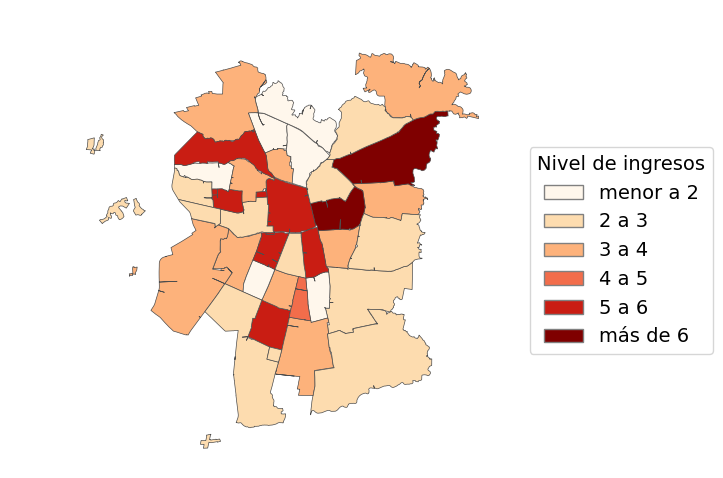

In [28]:
# Crear categorías manuales
bins = [1, 2, 3, 4, 5, 6, 7]
labels = ["menor a 2", "2 a 3", "3 a 4", "4 a 5", "5 a 6", "más de 6"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["nivel_promedio"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("OrRd", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False,
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.5', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Nivel de ingresos",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_title(f"Nivel de ingresos promedio por comuna - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/nivel_ingreso_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Grafico de resultados - Desviacion estandar
Se grafican los resultados obtenidos en orden ascendente.

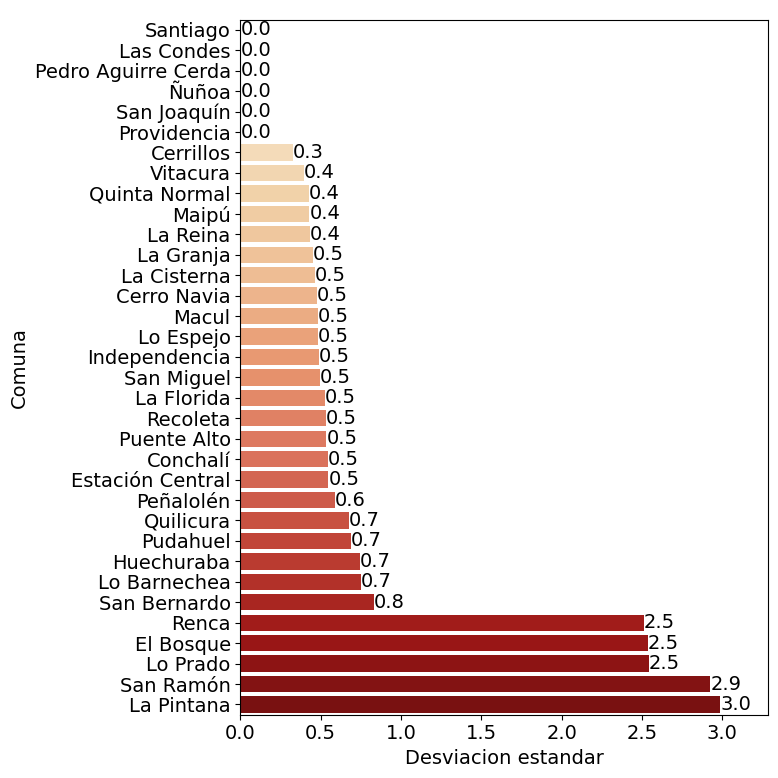

In [15]:
# Ordenar comunas
df_plot = merge_df.sort_values("desviacion_estandar", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="desviacion_estandar", y="Comuna_y", data=df_plot, palette="OrRd", hue="Comuna_y")

plt.xlabel("Desviacion estandar")
plt.ylabel("Comuna")
plt.title(f"Desviacion estandar, nivel de ingresos por comuna - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["desviacion_estandar"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.1)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["desviacion_estandar"]):
    plt.text(value, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/desviacion_estandar_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Desviacion estandar
Se grafican los resultados obtenidos en un mapa de coropletas

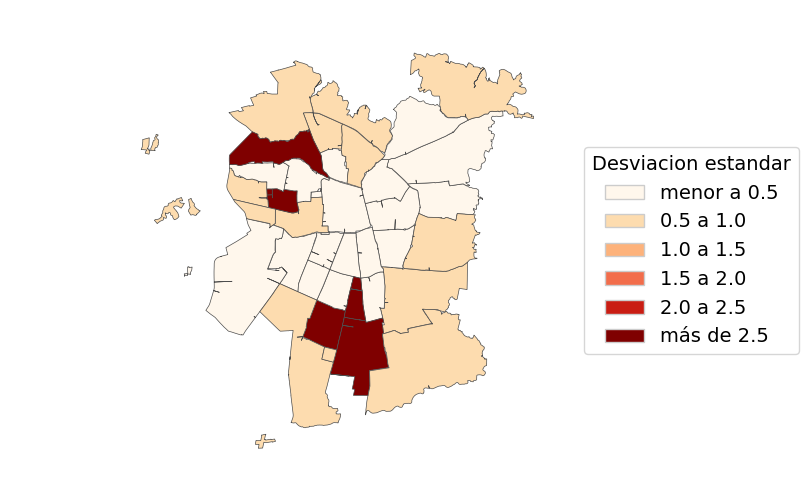

In [29]:
# Crear categorías manuales
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3]
labels = ["menor a 0.5","0.5 a 1.0","1.0 a 1.5","1.5 a 2.0","2.0 a 2.5","más de 2.5"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["desviacion_estandar"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa
cmap = plt.get_cmap("OrRd", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False,
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Desviacion estandar",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_title(f"Desviacion estandar, nivel de ingresos por comuna - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/desviacion_estandar_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Red publica de salud

### Grafico de resultados - Centros por 10.000 habitantes
Se grafican los resultados obtenidos en orden ascendente.

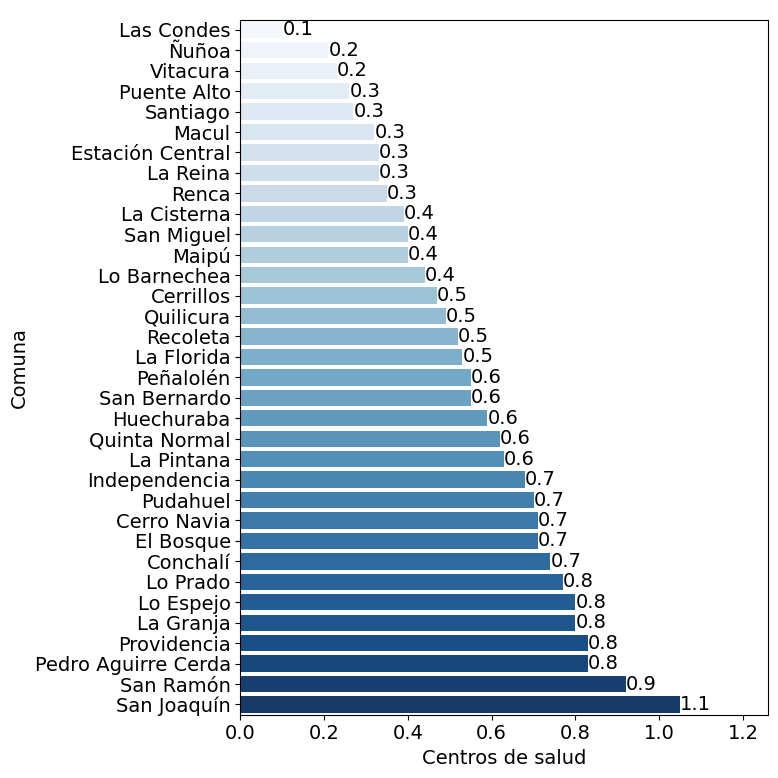

In [17]:
# Ordenar comunas
df_plot = merge_df.sort_values("tasa_centros_10k", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="tasa_centros_10k", y="Comuna_y", data=df_plot, palette="Blues", hue="Comuna_y")

plt.xlabel("Centros de salud")
plt.ylabel("Comuna")
plt.title(f"Centros de salud publicos por cada 10.000 habitantes - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["tasa_centros_10k"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["tasa_centros_10k"]):
    plt.text(value, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/centros_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Centros por 10.000 habitantes
Se grafican los resultados obtenidos en un mapa de coropletas

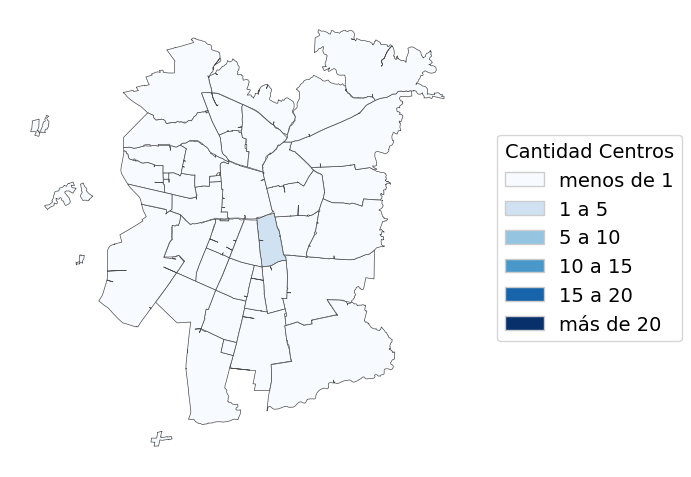

In [30]:
bins = [0, 1, 5, 10, 15, 20, 100]
labels = ["menos de 1", "1 a 5", "5 a 10", "10 a 15", "15 a 20", "más de 20"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["tasa_centros_10k"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa
cmap = plt.get_cmap("Blues", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False,
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Cantidad Centros",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
#ax.set_title(f"Centros de salud publicos por cada 10.000 habitantes - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/centros_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Atenciones en red publica de salud

### Grafico de resultados - Atenciones por 10.000 habitantes
Se grafican los resultados obtenidos en orden ascendente.

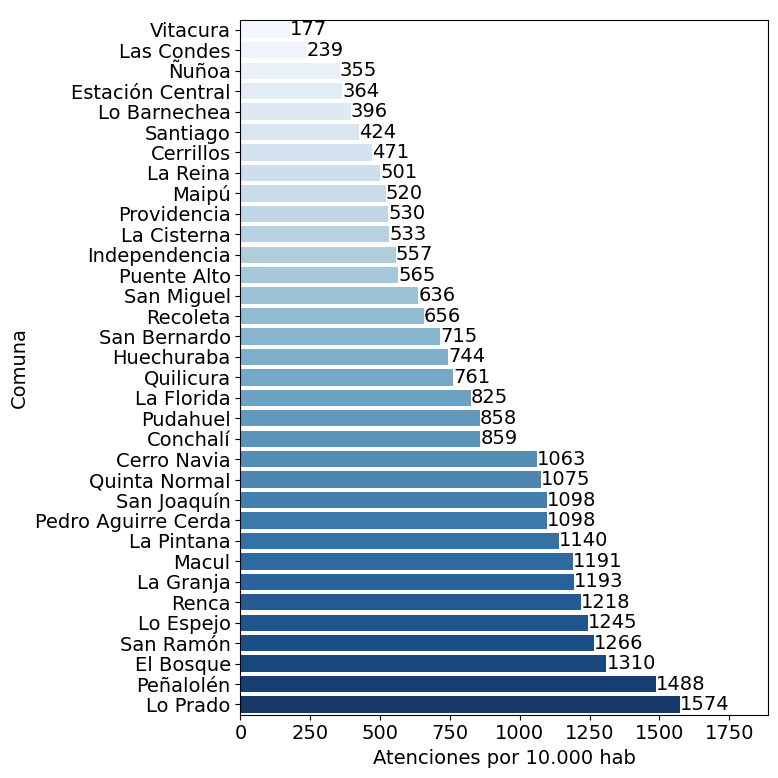

In [19]:
# Ordenar comunas
df_plot = merge_df.sort_values("tasa_atenciones_10k", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="tasa_atenciones_10k", y="Comuna_y", data=df_plot, palette="Blues", hue="Comuna_y")

plt.xlabel("Atenciones por 10.000 hab")
plt.ylabel("Comuna")
plt.title(f"Atenciones en salud publica por cada 10.000 habitantes - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["tasa_atenciones_10k"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["tasa_atenciones_10k"]):
    plt.text(value, index, f"{value:.0f}", va='center')

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/atenciones_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Atenciones por 10.000 habitantes
Se grafican los resultados obtenidos en un mapa de coropletas

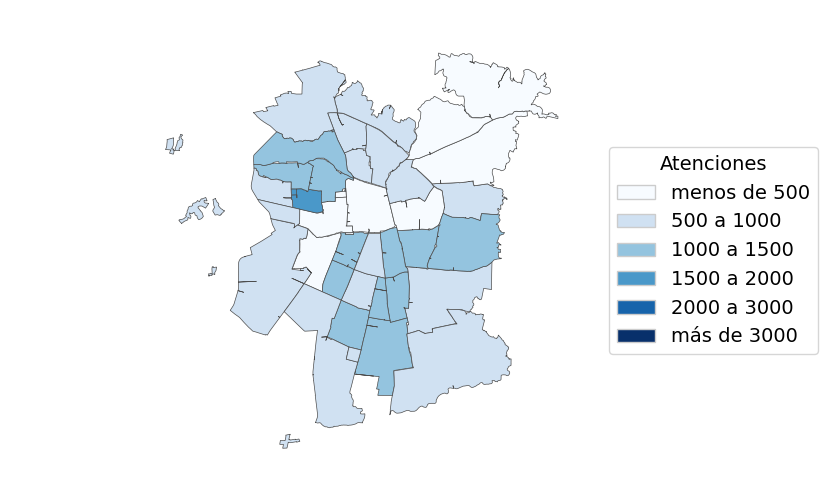

In [31]:
bins = [0, 500, 1000, 1500, 2000, 3000, 10000]
labels = ["menos de 500", "500 a 1000", "1000 a 1500", "1500 a 2000", "2000 a 3000", "más de 3000"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["tasa_atenciones_10k"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa
cmap = plt.get_cmap("Blues", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False,
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Atenciones",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_title(f"Atenciones en salud publica por cada 10.000 habitantes - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/atenciones_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Grafico de resultados - Porcentaje de atencion migrantes
Se grafican los resultados obtenidos en orden ascendente.

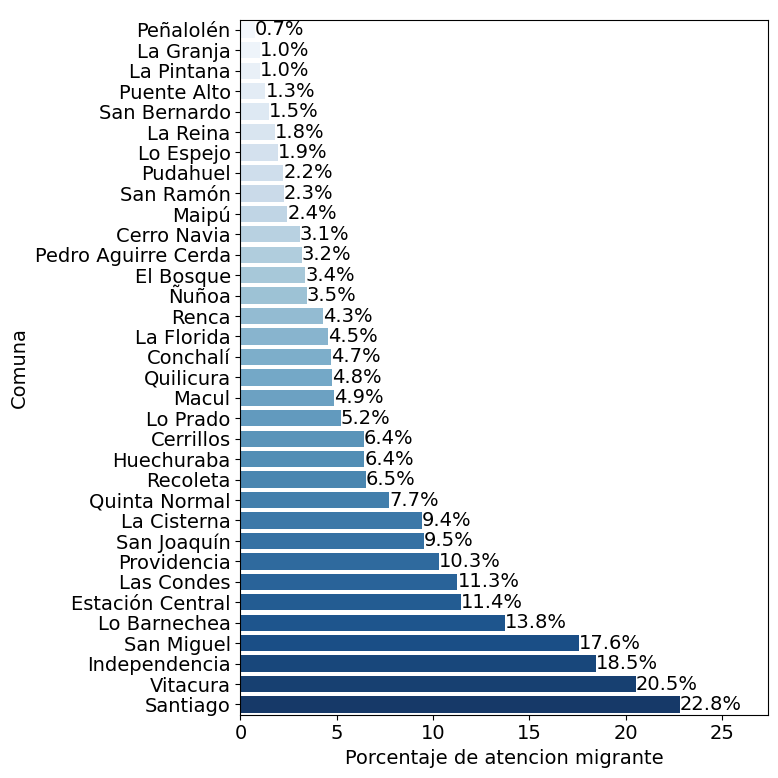

In [21]:
# Ordenar comunas
df_plot = merge_df.sort_values("porcentaje_migrantes_promedio", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="porcentaje_migrantes_promedio", y="Comuna_y", data=df_plot, palette="Blues", hue="Comuna_y")

plt.xlabel("Porcentaje de atencion migrante")
plt.ylabel("Comuna")
plt.title(f"Porcentaje de atencion migrante en salud publica - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["porcentaje_migrantes_promedio"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje_migrantes_promedio"]):
    plt.text(value, index, f"{value:.1f}%", va='center')

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/atenciones_migrante_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Porcentaje de atencion migrantes
Se grafican los resultados obtenidos en un mapa de coropletas

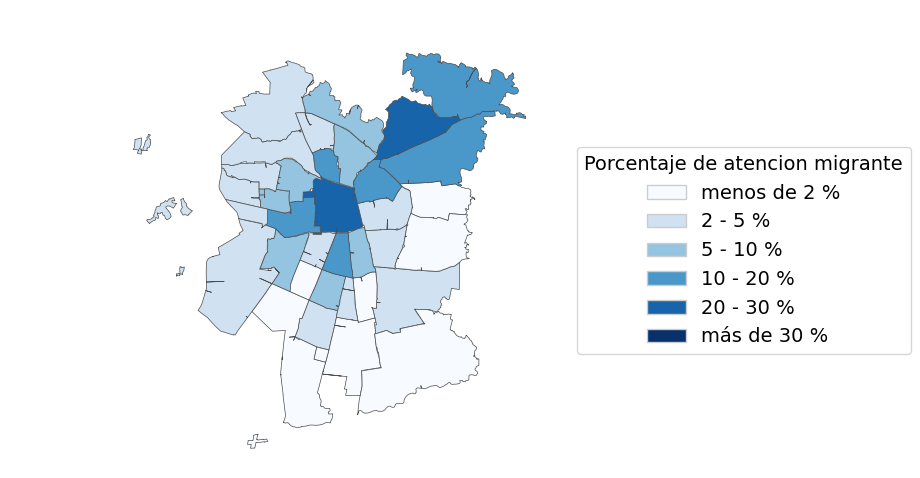

In [32]:
bins = [0, 2, 5, 10, 20, 30, 100]
labels = ["menos de 2 %", "2 - 5 %", "5 - 10 %", "10 - 20 %","20 - 30 %", "más de 30 %"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["porcentaje_migrantes_promedio"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa
cmap = plt.get_cmap("Blues", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False,
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Porcentaje de atencion migrante",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_title(f"Porcentaje de atencion migrante en salud publica - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/atenciones_migrante_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Densidad poblacional

### Grafico de resultados - Densidad poblacional
Se grafican los resultados obtenidos en orden ascendente.

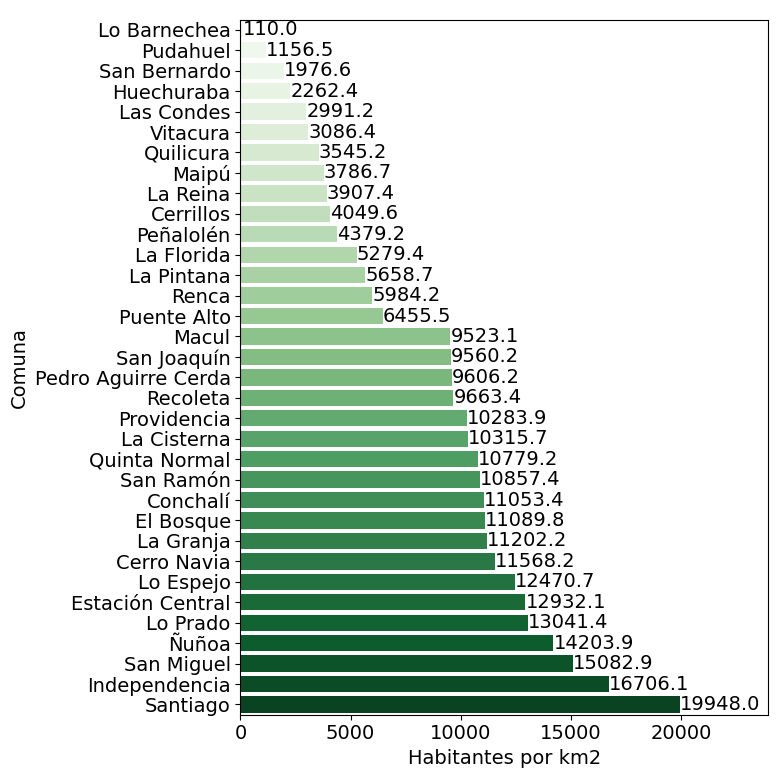

In [23]:
# Ordenar comunas
df_plot = merge_df.sort_values("densidad_poblacional", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="densidad_poblacional", y="Comuna_y", data=df_plot, palette="Greens", hue="Comuna_y")

plt.xlabel("Habitantes por km2")
plt.ylabel("Comuna")
plt.title(f"Densidad poblacional - {Region}")

# Calculamos el valor máximo de la columna
max_valor = df_plot["densidad_poblacional"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["densidad_poblacional"]):
    plt.text(value, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/densidad_{Region}_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Densidad poblacional
Se grafican los resultados obtenidos en un mapa de coropletas

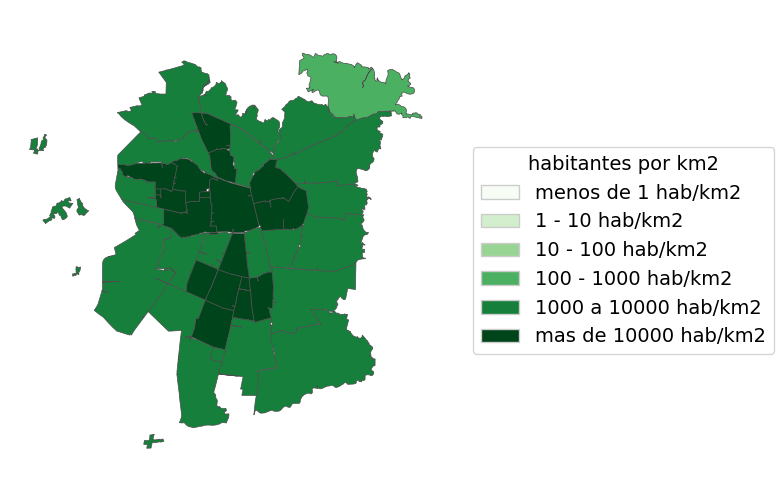

In [33]:
bins = [0, 1, 10, 100, 1000, 10000, 100000]
labels = ["menos de 1 hab/km2", "1 - 10 hab/km2", "10 - 100 hab/km2", "100 - 1000 hab/km2", "1000 a 10000 hab/km2", "mas de 10000 hab/km2"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["densidad_poblacional"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa
cmap = plt.get_cmap("Greens", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.5,
             edgecolor="0.3",
             legend=False,   
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="habitantes por km2",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_title(f"Densidad poblacional - {Region}", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    f"../../../../figures/regiones/{codigo}/densidad_{Region}_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()